Coleta e organização de dados
=========================

Professor: Marcos Cesar Gritti  
Email: cesargritti@gmail.com

Neste notebook, vamos aprender a:

1. Carregar fontes de dados;
2. Transformação e teste de estacionaridade;
3. ACF e PACF;

1 - Carregar fontes de dados
========================

No dia a dia de trabalho, um Cientista de Dados se depara com diferentes tipos fontes de dados. Nem sempre, em sua equipe, haverá um Engenheiro de Dados disponível para te ajudar a coletar dados de interesse em um formato fácil de integração com seu ambiente de desenvolvimento Python (ou qualquer outro ambiente de desenvolvimento científico), no nosso caso, o Jupyter Notebook. Portanto, é fundamental que você domine os principais formatos e/ou fontes existentes no mercado, para que não dependa de um terceiro para uma rápida prototipação/experimentação.

As principais fontes de dados, encontradas por um profissional da área, são:

    Arquivos .csv;
    Arquivos .json;
    Arquivos .parquet;
    Base de dados relacional SQL;
    Base de dados não relacional NoSQL;

Em empresas que seguem a filosofia **Data Driven** existirá, usualmente, uma pedaço de Software nominado de *Camada de Ingestão de Dados*. Esta camada, desenvolvida por Engenheiros de Dados, tem por objetivo centralizar diversas fontes de informação bruta (arquivos csv, json, parquet, imagens, audios, etc ...) em um único repositório (ou Buckets). Este repositório centralizado recebe o nome de **Data Lake**.

1.1 - Arquivo csv - Exercício
=======================

A existência de arquivos csv em Data Lakes não é predominante, pois, apesar de ser um arquivo fácil de se manipular, não é o mais eficiente (redução de espaço em disco e otimização de tempo de leitura). Entretanto, é o tipo de arquivo mais encontrado quando a informação ainda não está disponível no **Data Lake** (exportação de planilhas Excel, base de dados do IBGE, entre outras).

In [2]:
import pandas as pd

csv = pd.read_csv("inbound.csv")
csv

,date,volume
0,2021-03-22T00:00:00,2149.534005
1,2021-03-24T00:00:00,2046.123134
2,2021-04-08T00:00:00,2100.649039
3,2021-06-30T00:00:00,2611.150329
4,2021-07-03T00:00:00,2752.687263
...,...,...
65,2021-05-10T00:00:00,2364.212520
66,2021-06-28T00:00:00,2683.177930
67,2021-02-11T00:00:00,1964.341648
68,2021-04-09T00:00:00,2196.177741


1.2 - Arquivo json - Exercício
=======================

É o formato mais utilizado por Engenheiros de Software, devido à sua compatibilidade com as tecnologias de desenvolvimento de APIs da atualidade. Consequentemente, a quantidade de arquivos json em Data Lakes é volumosa.

No Pandas, importa-se um arquivo json utilizando o método read_json

In [4]:
json = pd.read_json("inbound.json")
json

,date,volume
0,2021-01-12,1956.478294
1,2021-02-03,1997.330023
2,2021-07-02,2752.285864
3,2021-05-02,2427.381330
4,2021-04-26,2392.681585
...,...,...
65,2021-06-22,2563.858834
66,2021-06-21,2591.716231
67,2021-03-23,2092.691866
68,2021-05-15,2400.405799


1.3 - Arquivo parquet - Exercício
==========================

É um formato de armazenamento colunar, disponível em todos os projetos do ecossistema *Hadoop*. Em suma, um arquivo parquet permite armazenar e consultar o arquivo de forma eficiênte, o que justifica seu emprego na construção de **Data Lakes**.

https://parquet.apache.org/

A API do Pandas é intuitiva! Para carregar um arquivo parquet, utilizamos o método pd.read_parquet

In [5]:
parquet = pd.read_parquet("inbound.parquet")
parquet

,date,volume
0,2021-06-17T00:00:00,2459.600528
1,2021-06-04T00:00:00,2547.755554
2,2021-07-01T00:00:00,2622.494284
3,2021-06-02T00:00:00,2454.901968
4,2021-04-06T00:00:00,2137.057207
...,...,...
65,2021-04-10T00:00:00,2249.214324
66,2021-06-08T00:00:00,2431.526375
67,2021-06-13T00:00:00,2580.713607
68,2021-07-20T00:00:00,2714.849337


1.4 - União de datasets - Exercício
============================

Os dados da aula de hoje foram divididos em três arquivos (os quais carregamos na células anteriores). Pesquise na documentação do Pandas como unir as linhas dos três dataframes que carregamos anteriormente em um novo dataframe.

https://pandas.pydata.org/docs/reference/index.html#api

Dica: Concatenar é a palavra chave de pesquisaq

Por fim, indexe o conjunto de dados pela coluna ``date``, convertendo-a para um objeto do tipo `datetime`, ordenando-os de forma ascendente. 

In [65]:
import seaborn as sns

sns.set(
    style="whitegrid", 
    rc={
        "figure.figsize": (10, 3.5),
        "figure.dpi": 100,
    }, 
    font_scale=1,
)

,volume
date,
2021-01-01,2020.227276
2021-01-02,2117.533884
2021-01-03,2152.242990
2021-01-04,2061.789286
2021-01-05,1969.932616
...,...
2021-07-25,2959.582029
2021-07-26,2887.204327
2021-07-27,2878.117751


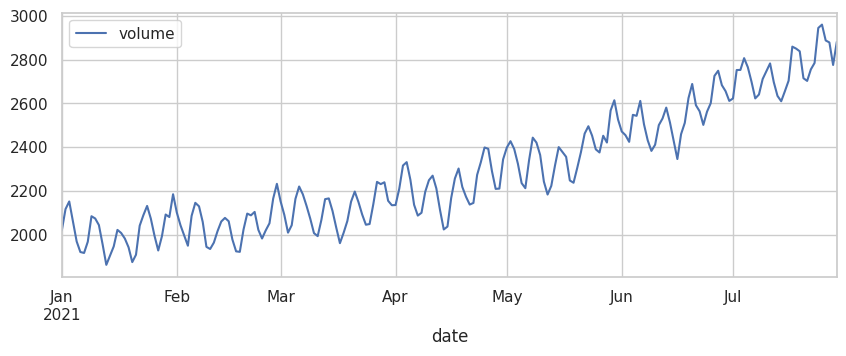

In [66]:
dados = pd.concat([
    csv,
    json,
    parquet
]).reset_index(drop=True)

dados.date = pd.to_datetime(dados.date)
dados = dados.set_index("date").sort_index()

# Persistindo os dados para futuros trabalhos
dados.to_parquet("dados.parquet")

# Carregando-os novamente para garantir que não há problemas na serialização
dados = pd.read_parquet("dados.parquet")
dados.plot()
dados

2 - Teste de estacionariedade - Exercício
========================================

Verifique se a Seŕie Temporal é estacionária utilizando um dos seguintes testes:
- (ADF) Augmented Dickey Fuller;
- (KPSS) Kwiatkowski-Phillips-Schmidt-Shin

Caso necessário, aplique diferenciações e/ou transformações para tornar a série estacionária.

Dica: Utilize a biblioteca `statsmodels` para testar as hipóteses de estacionaridade.  
https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html

In [67]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [68]:
# Teste de estacionariedade no sinal original
adf_test(dados)

Results of Dickey-Fuller Test:
Test Statistic                   1.697011
p-value                          0.998121
#Lags Used                      12.000000
Number of Observations Used    197.000000
Critical Value (1%)             -3.463987
Critical Value (5%)             -2.876326
Critical Value (10%)            -2.574652
dtype: float64


Valor p é de 0.998121, logo, não é possível rejeitar a hipótese nula e, consequentemente, o série não é estacionária.

In [69]:
# Teste de estacionaridade na diferenciação do sinal
d_dados = dados.diff(periods=1).dropna()
adf_test(d_dados)

Results of Dickey-Fuller Test:
Test Statistic                  -5.213898
p-value                          0.000008
#Lags Used                      11.000000
Number of Observations Used    197.000000
Critical Value (1%)             -3.463987
Critical Value (5%)             -2.876326
Critical Value (10%)            -2.574652
dtype: float64


Valor p é de 0.000008, logo, podemos rejeitar a hipótese nula e concluir que a série temporal é estacionária.

3 -  ACF e PACF - Exercício
========================================

Aplique a Função de Autocorrelação (ACF) e a Função de Autocorrelação Parcial (PACF) na série temporal.
Interprete e discuta os resultados com o professor.

Dica: Utilize a biblioteca `statsmodels` para testar as hipóteses de estacionaridade.  

In [73]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


<Figure size 1000x350 with 0 Axes>

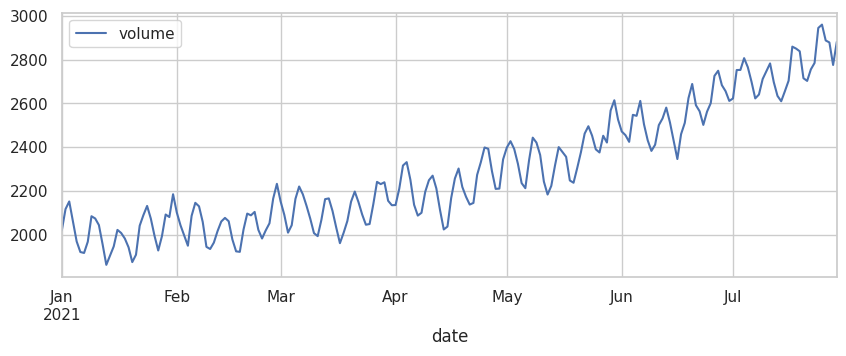

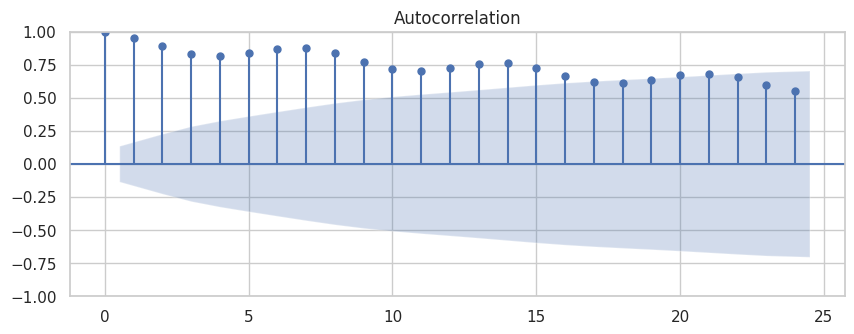

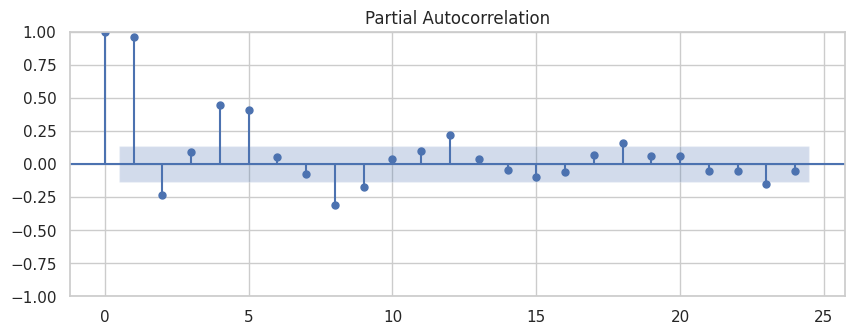

In [74]:
plt.figure(); dados.plot();
plot_acf(dados);
plot_pacf(dados);

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


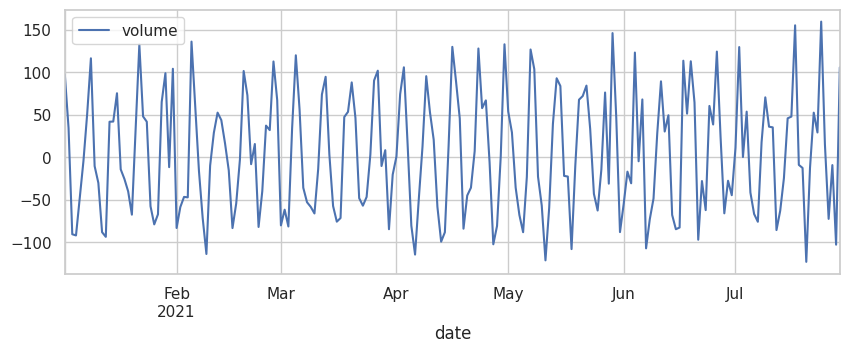

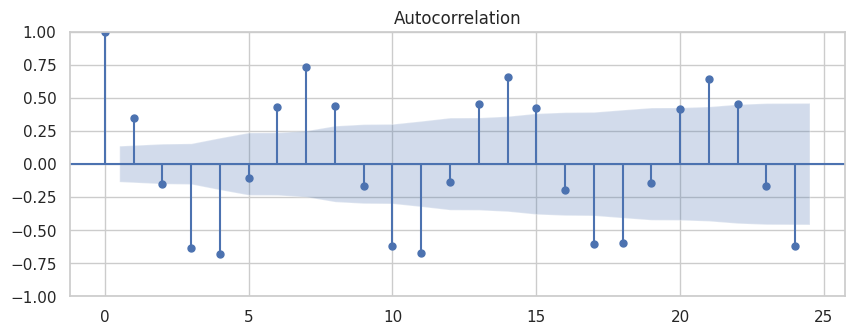

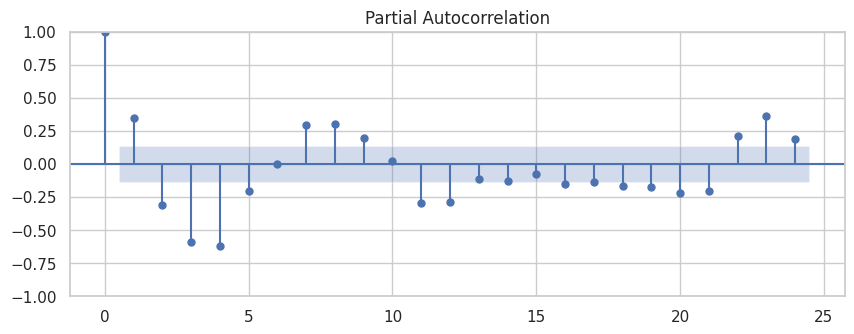

In [77]:
d_dados.plot();
plot_acf(d_dados);
plot_pacf(d_dados);